## Context

>***You have already worked on this dataset in the Data Pre-processing section, now it's time to actually make pridictions on the dataset. ***

We have reviewed the data from the Rustic Heights retirement home that are
undertaking a study on the movement of selected residents to improve their quality of
care. The data sets contain the motion data of 14 healthy residents aged between 66
and 86 years old. The residents performed broadly scripted activities using a battery
less, wearable sensor on top of their clothing at sternum level.

### The activities performed were:

• walking to the chair

• sitting on the chair

• getting off the chair

• walking to bed

• lying on bed

• getting off the bed

• walking to the door

### Each of these activities have been assigned the following labels:
1. sitting on bed
2. sitting on chair
3. lying on bed
4. ambulating (including standing and walking around the room)

___

***Things to do***
- Perform the data pre-processing. (Data is clean already but you can perform basic checks.)
- Perform EDA
- Using `StandardScalar` standardize the variables expect the target variable
- Convert the scaled features to a dataframe
- Split into training and testing set
- Fit Decision Tree, Random Forest Classifier
- Get Predictions
- Set n_estimators to a different values and retrain it.
- Validate Model's accuracy using confusion matrices.
- Creating a classification report from the results.
 
***What will be new***
- You will learn the Random Forest ML algorithm.
 
***What will be tricky***
- Random Forest is very similar to the Decision Tree model, hence, there won't be anything tricky in this section.

In [78]:
import pandas as pd

In [79]:
df = pd.read_csv('data.csv')

In [80]:
df.head()

id  gender  location  person    time  g_frontal  g_vertical  g_lateral  \
0  57106       2         2       3  321.75   0.342380     0.36516  -0.971540   
1  22711       2         1      45  183.38   0.612070     0.87042  -0.002281   
2  61677       1         2      14   38.00   0.084423     0.42258  -1.017200   
3  42785       2         1      52  141.85   0.541710     0.90487   0.043332   
4  64396       1         2      15   68.25   0.318930     0.49148  -0.937330   

   antenna  rssi    phase    freq  label  
0        2 -48.5  3.22140  920.25      3  
1        2 -56.0  0.37276  920.25      2  
2        3 -63.0  5.98250  920.25      3  
3        1 -64.5  3.91780  920.25      1  
4        3 -60.0  5.70180  920.25      3

In [81]:
df = df.drop(['id', 'freq'], axis=1)


In [82]:
# # DF info:
#  - df.shape : 383 x 14
#  - no missing values
#  - all numeric values

In [83]:
df.dtypes

gender          int64
location        int64
person          int64
time          float64
g_frontal     float64
g_vertical    float64
g_lateral     float64
antenna         int64
rssi          float64
phase         float64
label           int64
dtype: object

In [84]:
df.isnull().sum()

gender        0
location      0
person        0
time          0
g_frontal     0
g_vertical    0
g_lateral     0
antenna       0
rssi          0
phase         0
label         0
dtype: int64

# Standardize, split into train/ test, save a pandas df


In [86]:
# lets standardize the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# separate the data from the target attributes
X = df[['gender','location','person','time','g_frontal','g_vertical','g_lateral','antenna','rssi','phase']]
y = df['label']

# Get column names first (provided data was organised this way)
names = X.columns   

# standardize the data attributes
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(X)

# save as pandas datagrame
df = pd.DataFrame(df, columns=names)
df = pd.concat((df,y),axis=1)                # add the column with string values
df.head()

gender  location    person      time  g_frontal  g_vertical  g_lateral  \
0  0.950046  1.529318 -1.655557  0.086963  -0.916276    0.046026  -1.722119   
1  0.950046 -0.653886  0.630828 -0.446888  -0.250358    1.250979   0.488482   
2 -1.052581  1.529318 -1.056742 -1.007784  -1.553224    0.182963  -1.826257   
3  0.950046 -0.653886  1.011892 -0.607116  -0.424090    1.333136   0.592511   
4 -1.052581  1.529318 -1.002304 -0.891076  -0.974179    0.347277  -1.644096   

    antenna      rssi     phase  label  
0 -0.375854  1.898897  0.028818      3  
1 -0.375854  0.443352 -1.276090      2  
2  0.531332 -0.915158  1.293626      3  
3 -1.283040 -1.206267  0.347826      1  
4  0.531332 -0.332939  1.165042      3

In [87]:
# does it make sense to standardize the gender, location, time? 
  # - i would say that for gender, it is not an issue as output remains binary
  # what i am wondering is waht benefit it brings for location and time, for example

## EDA

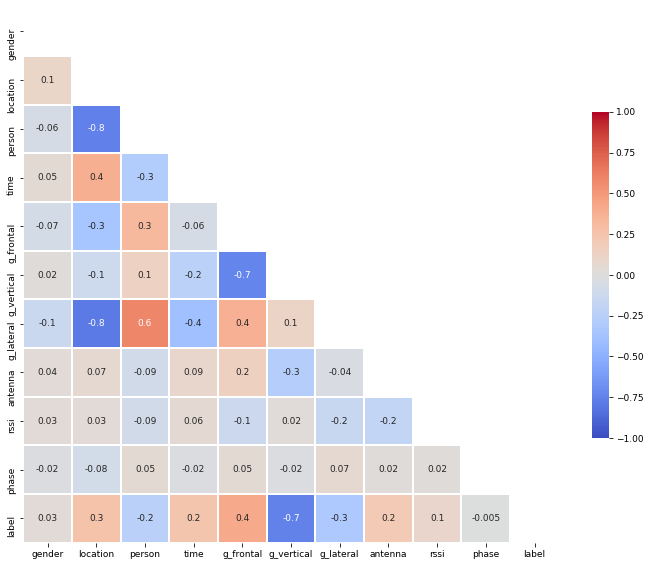

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(df.corr())

sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


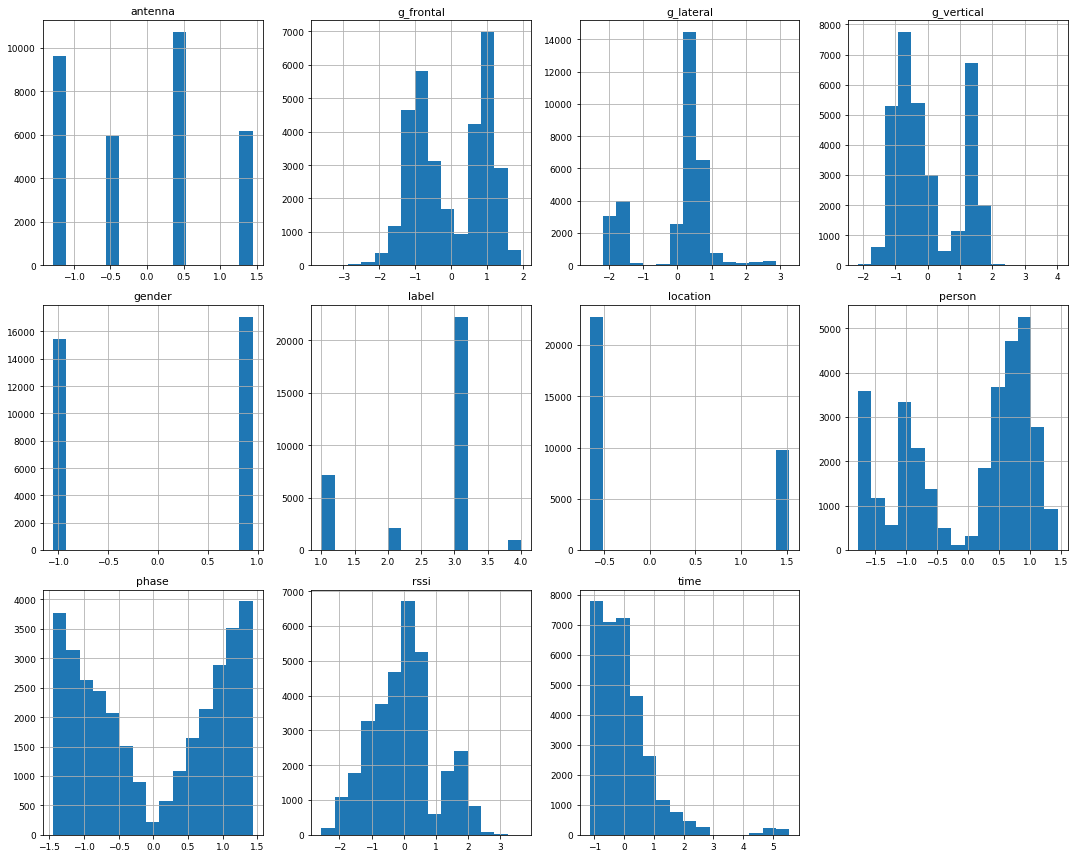

In [89]:
df.hist(bins=15, figsize=(15, 12), layout=(3, 4))
plt.tight_layout()


IndexError: list index out of range

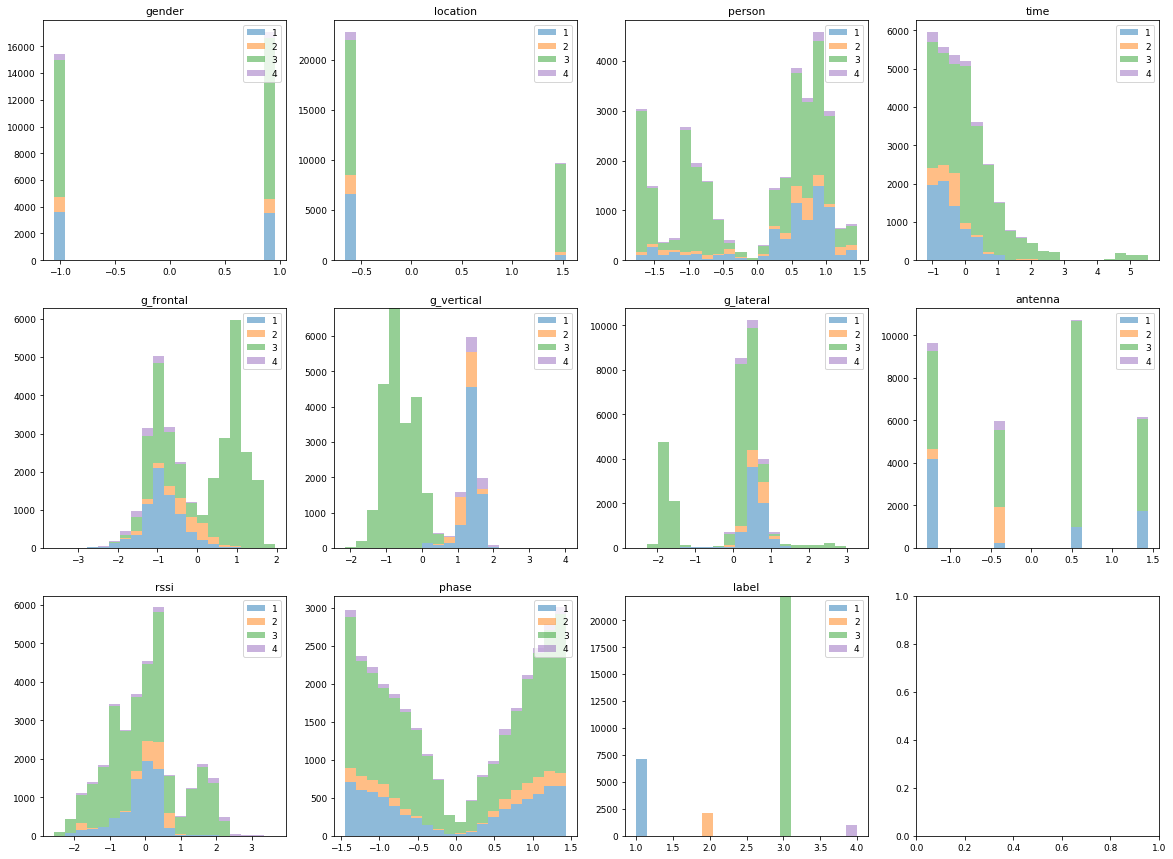

In [90]:
features_mean=list(df.columns[0:11])

# split dataframe into 4 based on label
df1 = df[df['label'] ==1]
df2 = df[df['label'] ==2]
df3 = df[df['label'] ==3]
df4 = df[df['label'] ==4]

#Stack the data
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
   
    ax.hist([df1[features_mean[idx]],df2[features_mean[idx]],df3[features_mean[idx]],df4[features_mean[idx]]], bins=20, alpha=0.5,stacked=True, label=['1','2','3','4'],color=['tab:blue','tab:orange','tab:green','tab:purple'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])


## Machine Learning

### Preparation

In [100]:
# Repeat from above
# separate the data from the target attributes
X = df[['gender','location','person','time','g_frontal','g_vertical','g_lateral','antenna','rssi','phase']]
y = df['label']


In [92]:
from sklearn.model_selection import train_test_split

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)       # >>> This is a Numpy array

acc_tree_train = round(classifier.score(X_train, y_train) * 100, 2)
acc_tree_test = round(classifier.score(X_test, y_test) * 100, 2)

print("Train Accuracy: ",acc_tree_train)
print("Test Accuracy: ", acc_tree_test)


Train Accuracy:  100.0
Test Accuracy:  98.74


In [96]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[1439    5    5   25]
 [   4  409    0    7]
 [   5    0 4405    0]
 [  20   10    1  165]]
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1474
           2       0.96      0.97      0.97       420
           3       1.00      1.00      1.00      4410
           4       0.84      0.84      0.84       196

    accuracy                           0.99      6500
   macro avg       0.95      0.95      0.95      6500
weighted avg       0.99      0.99      0.99      6500



In [99]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols = ['gender','location','person','time','g_frontal','g_vertical','g_lateral','antenna','rssi','phase']

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2', '3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('label.png')
Image(graph.create_png())

### Random Forest

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

acc_rtree_train = round(clf.score(X_train, y_train) * 100, 2)
acc_rtree_test = round(clf.score(X_test, y_test) * 100, 2)

print("Train Accuracy: ",acc_rtree_train)
print("Test Accuracy: ", acc_rtree_test)

Train Accuracy:  100.0
Test Accuracy:  99.2


In [109]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[1468    0    5    1]
 [   1  414    0    5]
 [   2    0 4408    0]
 [  28   10    0  158]]
              precision    recall  f1-score   support

           1       0.98      1.00      0.99      1474
           2       0.98      0.99      0.98       420
           3       1.00      1.00      1.00      4410
           4       0.96      0.81      0.88       196

    accuracy                           0.99      6500
   macro avg       0.98      0.95      0.96      6500
weighted avg       0.99      0.99      0.99      6500



In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=59)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

acc_rtree_train = round(clf.score(X_train, y_train) * 100, 2)
acc_rtree_test = round(clf.score(X_test, y_test) * 100, 4)

print("Train Accuracy: ",acc_rtree_train)
print("Test Accuracy: ", acc_rtree_test)

Train Accuracy:  100.0
Test Accuracy:  99.2


#### Optimisation

In [114]:
error_rate = []

for i in range(1,500):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train,y_train)
    pred_i = random_forest.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

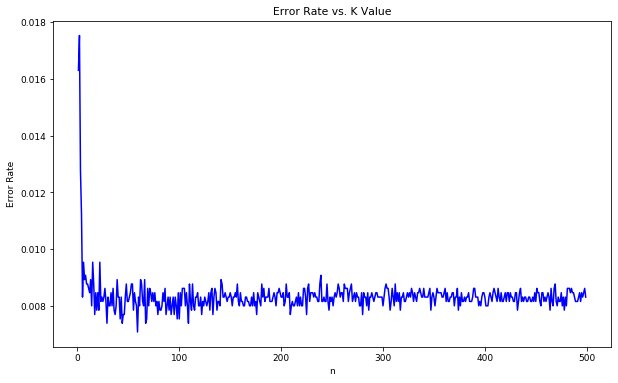

In [123]:
plt.figure(figsize=(10,6))

plt.plot(range(1,500),error_rate,color='blue')

plt.title('Error Rate vs. K Value')
plt.xlabel('n')
plt.ylabel('Error Rate')


In [145]:
error = pd.DataFrame(error_rate)
print(error.idxmin())
print(error.min()*100)



0    58
dtype: int64
0    0.707692
dtype: float64
